---
# Week 4 Webinar - Logistic Regression

_Author: Carleton Smith_

-----

## Webinar Outline

- Acquire data
- Initial EDA
- Prepare dataset
- Overview of Logistic Regression
    - GLM: three components
    - Linear Regression Review
    - Bend the output: probability, e, log, log odds
    - Create Log Reg and convert manually
    - Interpret Betas
- Compare Logistic Regression to other models
- Evaluating Logistic Regression
- Bonus: Balancing the data
    

---
## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 12
plt.style.use("fivethirtyeight")

---
## Acquire Data

In [2]:
adult = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                    na_values=' ?',
                    header=None)

**If the above line hangs, go to the site manually and download the dataset. Then use the line below.**

In [3]:
# adult = pd.read_csv('./adult.data.txt', header=None, na_values=' ?')

---
## Initial Exploratory Data Analysis & Preprocessing

- Add column headers
- Understand dataset
    - how many rows/columns?
    - what does a row represent?
    - what is our target variable?
- Check for missing values
- Check data types
- Check for unbalanced target variable

### Add Column Headers

In [4]:
adult.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**FEATURES**

1. `age`: continuous.
2. `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. `fnlwgt`: continuous.
4. `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. `education-num`: continuous.
6. `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
8. `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
9. `sex`: Female, Male.
10. `capital-gain`: continuous.
11. `capital-loss`: continuousm
12. `hours-per-week`: continuous.
13. `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [3]:
features = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital_gain',
    'capital_loss',
    'hours_per_week',
    'native_country',
    'income',
]

In [4]:
# quick look at the data
adult.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# assign column names
adult.columns = features

In [6]:
# look at first 5 rows:
### what does 1 row represent?
### what is our target variable?
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# how many rows a columns?
adult.shape

(32561, 15)

In [8]:
# any missing values?
adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [9]:
# what are the data types?
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [10]:
# what is the distribution of our target variable?
adult['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

We have unbalanced data. We need to take this into account when we build models. Why?

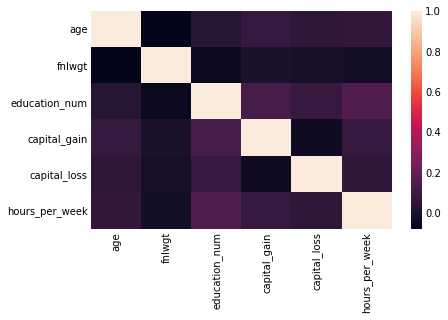

In [11]:
sns.heatmap(adult.corr());

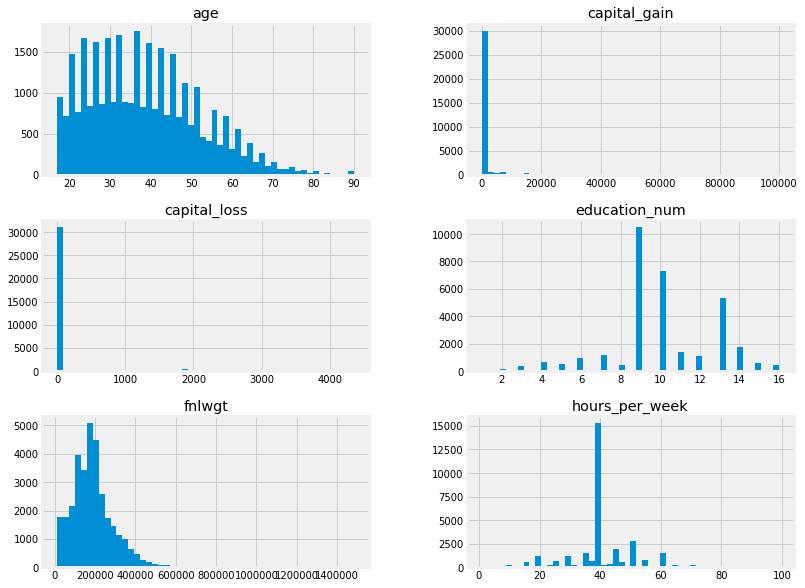

In [12]:
adult.hist(figsize=(12,10),bins=50);

In [13]:
adult[['capital_loss', 'capital_gain']].describe()

,capital_loss,capital_gain
count,32561.000000,32561.000000
mean,87.303830,1077.648844
std,402.960219,7385.292085
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,4356.000000,99999.000000


---
## Preprocessing

In the interest of time, I packaged these preprocessing steps into `Pipelines`.

**PREPROCESSING STEPS**
1. Separate target variable from features - sklearn requires this.
2. Peform a train-test split - Always do this before manipulating dataset
3. With training data:
    - **SEPARATE** numeric columns from categorical ones
    - **NUMERIC DF** preprocessing:
        - Replace nan values
        - Standardize features
   
    - **CATEGORICAL DF** preprocessing:
        - Replace nan values
        - Create dummy variables
    - **CONCATENATE** numeric and categorical DF
    - **ENCODE** target variable
<br>
<br>
4. Package these steps into a `Pipeline`

In [14]:
# make a list of numeric and categorical column names
num_cols = [col for col in adult.columns if adult[col].dtype != 'object']
cat_cols = [col for col in adult.columns if col not in num_cols + ['income']]

# separate features from target variable
X = adult.drop('income', axis=1)
y = adult['income']

# perform a train-test split.... why? stratify on y?
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify=y,
    random_state=24
)

def feature_extractor(df):
    return df.drop('income', axis=1)


def categorical_extractor(df):
    return df.select_dtypes(include=['object'])


def numeric_extractor(df):
    return df.select_dtypes(exclude=['object'])


def dummy_col_adder(array):
    dummy_cols = []
    for col, cat_set in zip(cat_cols, cat_pipe.named_steps['OneHotEncoder'].categories_):
        for cat in cat_set:
            dummy_cols.append(col+'_'+cat)
    return pd.DataFrame(array, columns=dummy_cols)


cat_transformer = FunctionTransformer(categorical_extractor, validate=False)
num_transformer = FunctionTransformer(numeric_extractor, validate=False)
dummy_col_transformer = FunctionTransformer(dummy_col_adder, validate=False)

# make numeric pipe
num_pipe = Pipeline([
    ('numeric_transformer', num_transformer),
    ('num_im', SimpleImputer(strategy='median')),
    ('StandardScaler', StandardScaler())
])

# make categorical pipe
cat_pipe = Pipeline([
    ('cat_transformer', cat_transformer),
    ('cat_im', SimpleImputer(strategy='most_frequent')),
    ('OneHotEncoder', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('dummy_col_transformer', dummy_col_transformer)
])


# make FeatureUnion
feat_union = FeatureUnion([
    ('num_pipe', num_pipe),
    ('cat_pipe', cat_pipe)
])

# make final feature pipe
feature_pipe = Pipeline([
    ('feat_union', feat_union)
])

#### Use this pipeline to _fit_ and _transform_ `X_train`

In [15]:
# fit and transform training data
X_train_prepared = pd.DataFrame(
    feature_pipe.fit(X_train).transform(X_train),
    index=X_train.index,
    columns = num_cols + [col+ '_' + level.strip()
                          for col, cat in zip(cat_cols, cat_pipe.named_steps['OneHotEncoder'].categories_)
                          for level in cat])
X_train_prepared.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
10348,-0.924812,0.012344,1.133671,-0.146749,-0.214716,-0.843279,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11062,1.712486,2.162427,-1.198581,-0.146749,-0.214716,-1.572986,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25734,-1.144586,2.329859,-0.421164,-0.146749,-0.214716,0.616136,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
401,-0.778295,-0.763740,-0.032455,-0.146749,-0.214716,-0.032493,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28063,1.126420,1.600147,1.133671,0.844477,-0.214716,1.183686,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Now use the fitted `feature_pipe` to _transform_ `X_test`

In [16]:
# transform testing data
X_test_prepared = pd.DataFrame(
    feature_pipe.transform(X_test),
    index=X_test.index,
    columns=num_cols + [col+ '_' + level.strip()
                          for col, cat in zip(cat_cols, cat_pipe.named_steps['OneHotEncoder'].categories_)
                          for level in cat])
X_test_prepared.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
2093,0.906645,-0.129961,1.133671,-0.146749,-0.214716,0.535058,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29473,-1.437619,1.329928,-1.198581,-0.146749,-0.214716,-0.032493,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14123,0.174062,1.430095,-2.753415,-0.146749,-0.214716,-0.032493,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10193,0.906645,-1.536521,-0.421164,-0.146749,-0.214716,-0.032493,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18789,0.320579,1.045784,-0.032455,-0.146749,-0.214716,-0.032493,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
10348,26,Private,190330,Bachelors,13,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
11062,62,Private,416829,11th,7,Separated,Other-service,Not-in-family,Black,Female,0,0,21,United-States
25734,23,Private,434467,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,0,0,48,United-States
401,28,Private,108574,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States
28063,54,Self-emp-inc,357596,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298,0,55,United-States


#### Use `LabelEncoder` to transform the `income` to be numeric

In [18]:
y_train[:5]

10348     <=50K
11062     <=50K
25734     <=50K
401       <=50K
28063      >50K
Name: income, dtype: object

In [19]:
# fit and transform y_train
le = LabelEncoder()
y_train_encoded = pd.Series(le.fit_transform(y_train), index=y_train.index)
y_train_encoded[:5]

10348    0
11062    0
25734    0
401      0
28063    1
dtype: int64

In [20]:
# transform ONLY: y_test
y_test_encoded = pd.Series(le.transform(y_test), index=y_test.index)
y_test_encoded[:5]

2093     1
29473    0
14123    0
10193    0
18789    0
dtype: int64

#### CALCULATE BASELINE MODEL: Use Majority Class

In [21]:
y_test_encoded.value_counts()[0] / y_test_encoded.value_counts().sum()

0.7592384072064694

The most simple model possible is using the majority class (under \$50k) as the prediction for every value.

We would achieve 76\% accuracy if we did this. All future models must beat this baseline.

---
## Overview of Logistic Regression

#### PREDICTING A SINGLE CATEGORICAL RESPONSE: LINEAR REGRESSION


Let's see what happens when we try to predict `income` using linear regression with one feature: `education_num`.
- Feature: `education_num`
- Target: `income`

In [22]:
X_train_prepared.head(3)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
10348,-0.924812,0.012344,1.133671,-0.146749,-0.214716,-0.843279,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11062,1.712486,2.162427,-1.198581,-0.146749,-0.214716,-1.572986,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25734,-1.144586,2.329859,-0.421164,-0.146749,-0.214716,0.616136,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
from sklearn.linear_model import LinearRegression

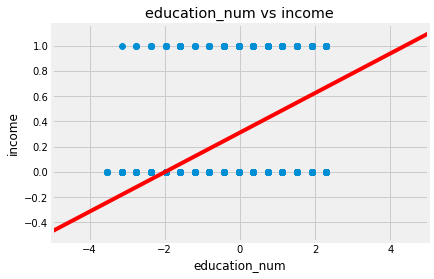

In [24]:
features = ['education_num']

#  fit linear regression model
lr = LinearRegression()
lr.fit(X_train_prepared[features], y_train_encoded)

#  predict with lin reg
y_pred = lr.predict(X_test_prepared[features])

#  plot data with regression line
fig, ax = plt.subplots()
ax.scatter(X_test_prepared[features], y_test_encoded)
ax.plot(np.linspace(-5,5,100), lr.predict(np.linspace(-5,6,100).reshape(-1,1)), color='red')
ax.set(xlabel='education_num', ylabel='income', xlim=(-5,5), title="education_num vs income");

This is not ideal. If `education_num` is below -2 or above 4.5, we will get a prediction outside of [0,1]. We want to "bend" the output so that we get a predicted probability of an individual belonging to class 1 or class 2.

---
## The "bend": Probability, e, Log, and Log Odds

To understand how logistic regression predicts the probability of class membership we need to start by understanding the relationship between probability, odds ratios, and log odds ratios. This is because logistic regression predicts log odds and so reading log odds is extremely useful for interpreting logistic regression.

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

It is often useful to think of the numeric odds as a ratio. For example, 5/1 = 5 odds is "5 to 1" -- five wins for every one loss (e.g. of six total plays). 2/3 odds means "2 to 3" -- two wins for every three losses (e.g. of five total plays).

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

In [27]:
# Create a table of probability versus odds.
table = pd.DataFrame({'probability':[0.001, 0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9, .999]})
table['odds'] = table.probability / (1 - table.probability)
table

,probability,odds
0,0.001,0.001001
1,0.100,0.111111
2,0.200,0.250000
3,0.250,0.333333
4,0.500,1.000000
5,0.600,1.500000
6,0.800,4.000000
7,0.900,9.000000
8,0.999,999.000000


### Understanding e and the Natural Logarithm

What is e? It is the base rate of growth shared by all continually growing processes:

e is the irrational base of the natural log `ln`.

- 2.718281828459

In [28]:
# Exponential function: e^1
e = np.exp(1)
e

2.718281828459045

What is a (natural) log? It gives you the time needed to reach a certain level of growth:

In [29]:
# Time needed to grow 1 unit to 2.718 units
# ln e = 1
np.log(2.718281828459045) # very close to previous value

1.0

Inverse of exponential function:

In [30]:
np.exp(5)

148.4131591025766

In [31]:
np.log(np.exp(5))

5.0

Lets take one of our odds from out table and walk through how it works.

In [32]:
table

,probability,odds
0,0.001,0.001001
1,0.100,0.111111
2,0.200,0.250000
3,0.250,0.333333
4,0.500,1.000000
5,0.600,1.500000
6,0.800,4.000000
7,0.900,9.000000
8,0.999,999.000000


In [33]:
np.log(0.25)

-1.3862943611198906

In [34]:
np.exp(-1.3862943611198906)

0.25

In [35]:
table['log_odds'] = np.log(table['odds'])
table

,probability,odds,log_odds
0,0.001,0.001001,-6.906755
1,0.100,0.111111,-2.197225
2,0.200,0.250000,-1.386294
3,0.250,0.333333,-1.098612
4,0.500,1.000000,0.000000
5,0.600,1.500000,0.405465
6,0.800,4.000000,1.386294
7,0.900,9.000000,2.197225
8,0.999,999.000000,6.906755


When we take the logarithm of the odds, we get what is known as the **log odds**. This may seem like an arbitrary transformation, but it has an important property: The log odds has the range $[-\infty, \infty]$. This is not true for the odds ratio, which can never be a negative number.

In [36]:
table['logodds'] = np.log(table['odds'])
table

,probability,odds,log_odds,logodds
0,0.001,0.001001,-6.906755,-6.906755
1,0.100,0.111111,-2.197225,-2.197225
2,0.200,0.250000,-1.386294,-1.386294
3,0.250,0.333333,-1.098612,-1.098612
4,0.500,1.000000,0.000000,0.000000
5,0.600,1.500000,0.405465,0.405465
6,0.800,4.000000,1.386294,1.386294
7,0.900,9.000000,2.197225,2.197225
8,0.999,999.000000,6.906755,6.906755


---
## Bringing it All Together

**LINEAR REGRESSION**: Continuous response is modeled as a linear combination of the features.

$$y = \beta_0 + \beta_1x$$

<br>

**LOGISTIC REGRESSION**: Also continuous, but bounded between 0 and 1. These probabilities are mapped to a discrete class prediction.

<br>

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

<br>
Simply rearrange this function:
<br>
<br>

$$\hat{p} = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In short:

- Logistic regression outputs the probabilities of a specific class.
- Those probabilities are converted into class predictions.

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
# fit logistic regression model
features = ['education_num']
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_prepared[features], y_train_encoded)

# make predictions
y_pred = logreg.predict_proba(X_test_prepared[features])[:,1]

In [39]:
logreg.predict_proba(X_test_prepared[features])

array([[0.57195242, 0.42804758],
       [0.92129495, 0.07870505],
       [0.98029357, 0.01970643],
       ...,
       [0.79817827, 0.20182173],
       [0.79817827, 0.20182173],
       [0.92129495, 0.07870505]])

In [40]:
y_pred

array([0.42804758, 0.07870505, 0.01970643, ..., 0.20182173, 0.20182173,
       0.07870505])

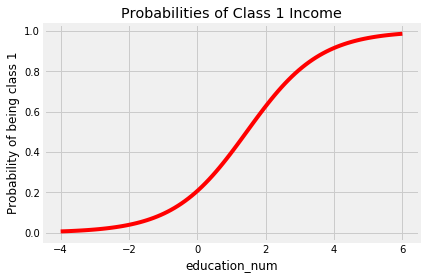

In [41]:
# plot the probability predictions
fix, ax = plt.subplots()
ax.plot(np.linspace(-4,6,100), logreg.predict_proba(np.linspace(-4,6,100).reshape(-1,1))[:,1], color='red')
ax.set(
    xlabel='education_num',
    ylabel='Probability of being class 1',
    title="Probabilities of Class 1 Income");

Let's back into these predictions.

In [42]:
X_test_prepared['education_num'].head(1)

2093    1.133671
Name: education_num, dtype: float64

In [43]:
OBSERVATION = 1.133671
logodds = logreg.intercept_ + logreg.coef_ * OBSERVATION
logodds

array([[-0.28982138]])

In [44]:
# convert to odds
odds = np.exp(logodds)
odds

array([[0.74839723]])

In [45]:
# convert odds to probability
prob = odds / (1 + odds)
prob

array([[0.4280476]])

In [46]:
# cross reference this with `.predict_proba`
logreg.predict_proba([[OBSERVATION]])[:,1]

array([0.4280476])

---
## Interpreting Beta Coeficients

A little more work is involved in converting log odds to probability, but it can be done relatively easily.

The interpretation comes down to this:

    Positive coefficients increase the log odds of the response (and thus increase the probability), and negative  coefficients decrease the log odds of the response (and thus decrease the probability).

---
## Comparing Logistic Regression

**PROS**:
- Well understood
- Interpretable
- Training is fast and scalable
- Performs well on small datasets

**CONS**:
- Not competitive with state of the art in terms of performance
- Makes assumptions about the data
- A lot of work in feature selection/engineering

---
## Create and Evaluate a Model

#### Fit a new model

In [47]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_prepared, y_train_encoded)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

#### Grab Coefs and variabes

In [ ]:
coef_lst = [(col, coef) for col, coef in zip(X_train_prepared.columns, logreg.coef_[0])]

sorted(coef_lst, key=lambda x: x[1], reverse=True)

#### Evaluate Model on Test Set

In [50]:
logreg.score(X_test_prepared, y_test_encoded)

0.8516736615825571

Not bad!! But Accuracy is not a good metric when there are unbalanced classes.

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
# make predictions for training and test:
y_pred_train = logreg.predict(X_train_prepared)
y_pred_test = logreg.predict(X_test_prepared)

In [53]:
y_train_encoded.value_counts()

0    17303
1     5489
dtype: int64

In [54]:
print('CLASSIFICATION METRICS FOR TRAINING: \n')
print(classification_report(y_train_encoded, y_pred_train))
print('#########################################################\n')

print('CLASSIFICATION METRICS FOR TESTING: \n')
print(classification_report(y_test_encoded, y_pred_test))

CLASSIFICATION METRICS FOR TRAINING: 

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     17303
           1       0.74      0.60      0.66      5489

   micro avg       0.85      0.85      0.85     22792
   macro avg       0.81      0.77      0.78     22792
weighted avg       0.85      0.85      0.85     22792

#########################################################

CLASSIFICATION METRICS FOR TESTING: 

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7417
           1       0.74      0.60      0.66      2352

   micro avg       0.85      0.85      0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.85      0.85      0.85      9769



**Interpretation**: Performance is fairly consistent (low variance), but we don't predict people making over 50K very well.

----

## BONUS: Balance the data with undersampling

In [55]:
# Find the number of observations in minority class
len_minority = y_train_encoded.sum()
len_minority

5489

#### WARNING: Balance the training data _only_. DO NOT balance the test set... leave that data representative of the true distribution

In [56]:
# Grab a sample from the majority class
X_train_majority_sample = X_train_prepared[y_train_encoded == 0].sample(len_minority)

# Grab ALL of the minority class samples
X_train_min = X_train_prepared[y_train_encoded==1]

# Concatenate the majority sample and the minority data
balanced = pd.concat([X_train_majority_sample, X_train_min], axis=0)

Fit and evaluate a logistic regression model

In [57]:
# Instantiate model
logreg = LogisticRegression(solver='liblinear')

# Fit the model with our BALANCED dataset
logreg.fit(balanced, y_train_encoded[balanced.index])

# Print the results on balanced dataset
print(classification_report(y_train_encoded[balanced.index], logreg.predict(balanced)))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      5489
           1       0.81      0.85      0.83      5489

   micro avg       0.82      0.82      0.82     10978
   macro avg       0.82      0.82      0.82     10978
weighted avg       0.82      0.82      0.82     10978



In [58]:
# Results on testing data
print(classification_report(y_test_encoded, logreg.predict(X_test_prepared)))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      7417
           1       0.57      0.84      0.68      2352

   micro avg       0.81      0.81      0.81      9769
   macro avg       0.75      0.82      0.77      9769
weighted avg       0.85      0.81      0.82      9769

